<a href="https://colab.research.google.com/github/ssahin7/GenerativeAIProject/blob/main/T%C3%BCmModelDenemeleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Üretken Yapay Zeka Final Projesi

İsim : Şevval ŞAHİN

Okul Numarası: 220212034

Proje : İki farklı kaynaktan alınan görüntülerle var olmayan bir insan fotoğrafı oluşturulması.

# 1.Kütüphanelerin Yüklenmesi

In [ ]:
!pip install torchvision
import os
import torch
import torch.nn as nn
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
from PIL import Image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# 2.Veri Setinin Oluşturulması


*   Emma Watson'un Video Görüntülerinden Yüzüne Ait Fotoğraf Karelerinin Çıkarılması
*   Şevval Şahin'in  Video Görüntülerinden Yüzüne Ait Fotoğraf Karelerinin Çıkarılması

*   Verilerin Eşit Sayıda Olması İçin Fazla Verinin Düzenlenmesi





In [ ]:
import cv2
import os
from google.colab import drive


drive.mount('/content/drive')

video_paths = [
    "/content/drive/MyDrive/Videolar/S001.mp4",
    "/content/drive/MyDrive/Videolar/S002.mp4",
    "/content/drive/MyDrive/Videolar/S004.mp4"
]

output_dir = '/content/drive/MyDrive/extracted_faces_allsevvalsahin2'
os.makedirs(output_dir, exist_ok=True)

# Yüz algılayıcı
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

count = 0

for video_path in video_paths:
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]
            cv2.imwrite(f'{output_dir}/face_{count}.jpg', face_img)
            count += 1
            break

    cap.release()

print(f'Toplam {count} yüz karesi çıkarıldı ve "{output_dir}" klasörüne kaydedildi.')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Toplam 1027 yüz karesi çıkarıldı ve "/content/drive/MyDrive/extracted_faces_allsevvalsahin2" klasörüne kaydedildi.


In [ ]:
import cv2
import os
from google.colab import drive


video_paths = [
    "/content/drive/MyDrive/Videolar/id11_0004.mp4",
    "/content/drive/MyDrive/Videolar/id11_0005.mp4",
    "/content/drive/MyDrive/Videolar/id11_0010.mp4"
]


output_dir = '/content/drive/MyDrive/extracted_faces_allemmawatson2'
os.makedirs(output_dir, exist_ok=True)

# Yüz algılayıcı
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

count = 0

for video_path in video_paths:
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]
            cv2.imwrite(f'{output_dir}/face_{count}.jpg', face_img)
            count += 1
            break

    cap.release()

print(f'Toplam {count} yüz karesi çıkarıldı ve "{output_dir}" klasörüne kaydedildi.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Toplam 993 yüz karesi çıkarıldı ve "/content/drive/MyDrive/extracted_faces_allemmawatson2" klasörüne kaydedildi.


In [ ]:
import os
import shutil


folder_path = '/content/drive/MyDrive/extracted_faces_allsevvalsahin2'
output_drive_folder = '/content/drive/MyDrive/FinalFaces/Sevval2'
max_photos = 993

os.makedirs(output_drive_folder, exist_ok=True)

files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f'Toplam fotoğraf sayısı: {len(files)}')

if len(files) > max_photos:
    num_to_delete = len(files) - max_photos
    files.sort()
    files_to_delete = files[:num_to_delete]

    for file_name in files_to_delete:
        os.remove(os.path.join(folder_path, file_name))

    print(f'{num_to_delete} dosya silindi, klasörde {max_photos} dosya kaldı.')
else:
    print('Fotoğraf sayısı 993 veya daha az, silinecek dosya yok.')

remaining_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for f in remaining_files:
    src = os.path.join(folder_path, f)
    dst = os.path.join(output_drive_folder, f)
    shutil.copy2(src, dst)

print(f'{len(remaining_files)} fotoğraf Drive\'daki "{output_drive_folder}" klasörüne kopyalandı.')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Toplam fotoğraf sayısı: 1027
34 dosya silindi, klasörde 993 dosya kaldı.
993 fotoğraf Drive'daki "/content/drive/MyDrive/FinalFaces/Sevval2" klasörüne kopyalandı.


1.GAN Modeli Denemesi

*   Veri seti tanımı
*   Görsellerin Yeniden Boyutlandırılması
*   Generatör Ayarları
*   Discriminatör Ayarları
*   Modelin Eğitilmesi








In [ ]:
class CustomFaceDataset(Dataset):
    def __init__(self, dir1, dir2, transform=None):
        self.dir1 = sorted([os.path.join(dir1, x) for x in os.listdir(dir1) if x.endswith('.jpg')])
        self.dir2 = sorted([os.path.join(dir2, x) for x in os.listdir(dir2) if x.endswith('.jpg')])
        self.transform = transform

    def __len__(self):
        return min(len(self.dir1), len(self.dir2))

    def __getitem__(self, idx):
        img1 = Image.open(self.dir1[idx]).convert("RGB")
        img2 = Image.open(self.dir2[idx]).convert("RGB")

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2



In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = CustomFaceDataset("/content/drive/MyDrive/FinalFaces/Sevval2", "/content/drive/MyDrive/extracted_faces_allemmawatson2", transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)



In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Conv2d(6, 64, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1), nn.BatchNorm2d(512), nn.ReLU()
        )
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1), nn.Tanh()
        )

    def forward(self, src, ref):
        x = torch.cat([src, ref], dim=1)
        return self.dec(self.enc(x))


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1), nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 4, 1, 1)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = Generator().to(device)
disc = Discriminator().to(device)

loss_fn = nn.BCEWithLogitsLoss()
recon_loss = nn.L1Loss()
opt_G = torch.optim.Adam(gen.parameters(), lr=0.0005, betas=(0.5, 0.999))
opt_D = torch.optim.Adam(disc.parameters(), lr=0.0005, betas=(0.5, 0.999))

epochs = 50
for epoch in range(epochs):
    for src, ref in dataloader:
        src, ref = src.to(device), ref.to(device)

        # Discriminator
        fake = gen(src, ref).detach()
        real_out = disc(ref)
        fake_out = disc(fake)

        real_label = torch.ones_like(real_out)
        fake_label = torch.zeros_like(fake_out)
        d_loss = (loss_fn(real_out, real_label) + loss_fn(fake_out, fake_label)) / 2

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # Generator
        fake = gen(src, ref)
        adv = loss_fn(disc(fake), real_label)
        rec = recon_loss(fake, src)
        g_loss = adv + 10 * rec

        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

    print(f"[{epoch+1}/{epochs}] D: {d_loss.item():.4f}, G: {g_loss.item():.4f}")
    torch.save(gen.state_dict(), "deep_face_generator.pth")



[1/50] D: 0.6729, G: 3.5929
[2/50] D: 0.4427, G: 2.9552
[3/50] D: 0.1387, G: 4.8293
[4/50] D: 0.3599, G: 2.9995
[5/50] D: 0.2144, G: 3.7952
[6/50] D: 0.0614, G: 5.0870
[7/50] D: 0.9999, G: 4.5565
[8/50] D: 0.1205, G: 4.6605
[9/50] D: 0.0339, G: 6.1359
[10/50] D: 0.6656, G: 3.5808
[11/50] D: 0.1370, G: 4.0442
[12/50] D: 0.4981, G: 4.3518
[13/50] D: 0.3989, G: 3.0753
[14/50] D: 0.2809, G: 4.1787
[15/50] D: 0.3689, G: 3.4041
[16/50] D: 0.5145, G: 3.3035
[17/50] D: 0.6382, G: 3.8913
[18/50] D: 0.5249, G: 2.7416
[19/50] D: 0.2247, G: 4.0325
[20/50] D: 0.3413, G: 4.5691
[21/50] D: 0.3817, G: 4.9718
[22/50] D: 0.4121, G: 4.3711
[23/50] D: 0.3355, G: 4.7551
[24/50] D: 0.3391, G: 4.4018
[25/50] D: 0.4964, G: 4.3260
[26/50] D: 0.7916, G: 3.9871
[27/50] D: 0.3372, G: 4.1432
[28/50] D: 0.9029, G: 4.9655
[29/50] D: 0.5050, G: 5.0491
[30/50] D: 0.3667, G: 4.3130
[31/50] D: 0.3087, G: 4.7797
[32/50] D: 0.2701, G: 4.5150
[33/50] D: 0.2314, G: 5.3478
[34/50] D: 0.6044, G: 4.6381
[35/50] D: 0.3072, G: 3

# Sonucun Görselleştirilmesi

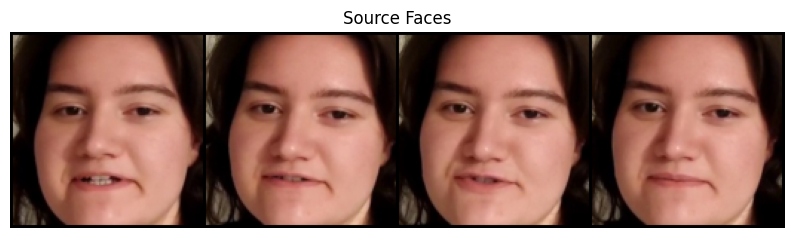

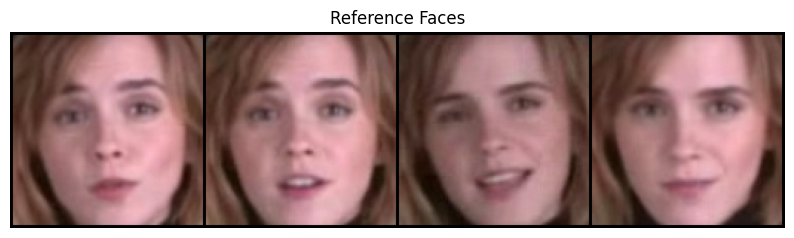

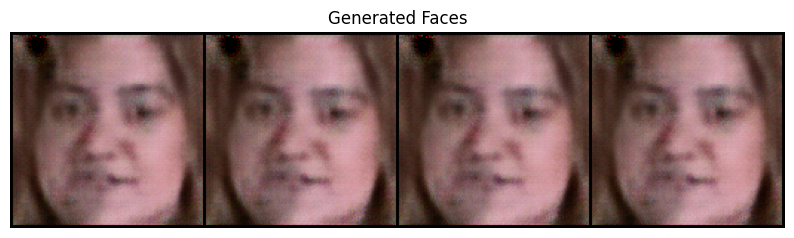

In [ ]:
import matplotlib.pyplot as plt

gen.eval()
with torch.no_grad():
    src, ref = next(iter(dataloader))
    src, ref = src.to(device), ref.to(device)
    out = gen(src, ref)

    def show_images(images, title):
        img_grid = utils.make_grid(images.cpu(), nrow=4, normalize=True)
        plt.figure(figsize=(10, 5))
        plt.title(title)
        plt.imshow(img_grid.permute(1, 2, 0))
        plt.axis("off")
        plt.show()

    show_images(src, "Source Faces")
    show_images(ref, "Reference Faces")
    show_images(out, "Generated Faces")


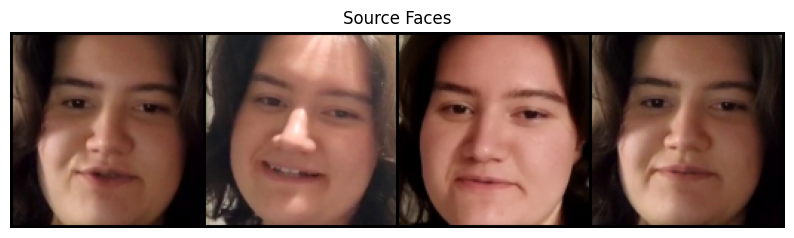

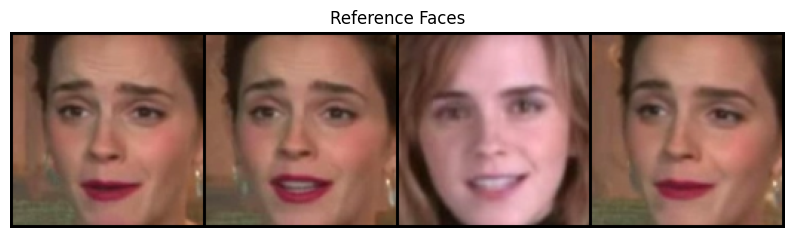

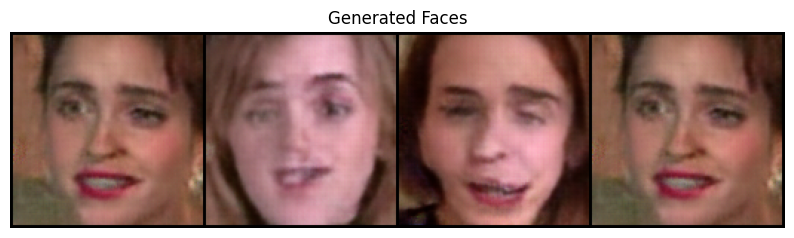

In [ ]:
import matplotlib.pyplot as plt

gen.eval()
with torch.no_grad():
    src, ref = next(iter(dataloader))
    src, ref = src.to(device), ref.to(device)
    out = gen(src, ref)

    def show_images(images, title):
        img_grid = utils.make_grid(images.cpu(), nrow=4, normalize=True)
        plt.figure(figsize=(10, 5))
        plt.title(title)
        plt.imshow(img_grid.permute(1, 2, 0))
        plt.axis("off")
        plt.show()

    show_images(src, "Source Faces")
    show_images(ref, "Reference Faces")
    show_images(out, "Generated Faces")


# Unet Mimarisi Eğitimi

In [14]:
import os
import glob
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


class FaceDataset(Dataset):
    def __init__(self, paths, transform=None):
        self.image_paths = []
        for path in paths:
            self.image_paths += glob.glob(os.path.join(path, "*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


class UNetGenerator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, features=64):
        super(UNetGenerator, self).__init__()


        self.enc1 = self._block(in_channels, features)
        self.enc2 = self._block(features, features * 2)
        self.enc3 = self._block(features * 2, features * 4)
        self.enc4 = self._block(features * 4, features * 8)


        self.bottleneck = self._block(features * 8, features * 16)


        self.dec1 = self._up_block(features * 16, features * 8)
        self.dec2 = self._up_block(features * 8, features * 4)
        self.dec3 = self._up_block(features * 4, features * 2)
        self.dec4 = self._up_block(features * 2, features)


        self.final_upsample = nn.ConvTranspose2d(features, features, kernel_size=4, stride=2, padding=1)
        self.final = nn.Conv2d(features, out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(enc1)
        enc3 = self.enc3(enc2)
        enc4 = self.enc4(enc3)

        bottleneck = self.bottleneck(enc4)

        dec1 = self.dec1(bottleneck) + enc4
        dec2 = self.dec2(dec1) + enc3
        dec3 = self.dec3(dec2) + enc2
        dec4 = self.dec4(dec3) + enc1

        upsampled = self.final_upsample(dec4)
        return torch.sigmoid(self.final(upsampled))

    def _block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def _up_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_size = 128
batch_size = 64
epochs = 50
lr = 0.0005


transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
])

paths = [
    "/content/drive/MyDrive/FinalFaces/Sevval2",
    "/content/drive/MyDrive/extracted_faces_allemmawatson2"
]
dataset = FaceDataset(paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


model = UNetGenerator().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images in dataloader:
        images = images.to(device)
        output = model(images)
        loss = criterion(output, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss / len(dataloader):.4f}")


torch.save(model.state_dict(), "unet_face_fusion_128.pth")


Epoch [1/50] - Loss: 0.0091
Epoch [2/50] - Loss: 0.0009
Epoch [3/50] - Loss: 0.0006
Epoch [4/50] - Loss: 0.0005
Epoch [5/50] - Loss: 0.0006
Epoch [6/50] - Loss: 0.0005
Epoch [7/50] - Loss: 0.0003
Epoch [8/50] - Loss: 0.0003
Epoch [9/50] - Loss: 0.0003
Epoch [10/50] - Loss: 0.0003
Epoch [11/50] - Loss: 0.0005
Epoch [12/50] - Loss: 0.0002
Epoch [13/50] - Loss: 0.0002
Epoch [14/50] - Loss: 0.0003
Epoch [15/50] - Loss: 0.0002
Epoch [16/50] - Loss: 0.0005
Epoch [17/50] - Loss: 0.0008
Epoch [18/50] - Loss: 0.0006
Epoch [19/50] - Loss: 0.0004
Epoch [20/50] - Loss: 0.0003
Epoch [21/50] - Loss: 0.0002
Epoch [22/50] - Loss: 0.0002
Epoch [23/50] - Loss: 0.0002
Epoch [24/50] - Loss: 0.0003
Epoch [25/50] - Loss: 0.0002
Epoch [26/50] - Loss: 0.0003
Epoch [27/50] - Loss: 0.0003
Epoch [28/50] - Loss: 0.0002
Epoch [29/50] - Loss: 0.0002
Epoch [30/50] - Loss: 0.0003
Epoch [31/50] - Loss: 0.0003
Epoch [32/50] - Loss: 0.0002
Epoch [33/50] - Loss: 0.0001
Epoch [34/50] - Loss: 0.0002
Epoch [35/50] - Loss: 0

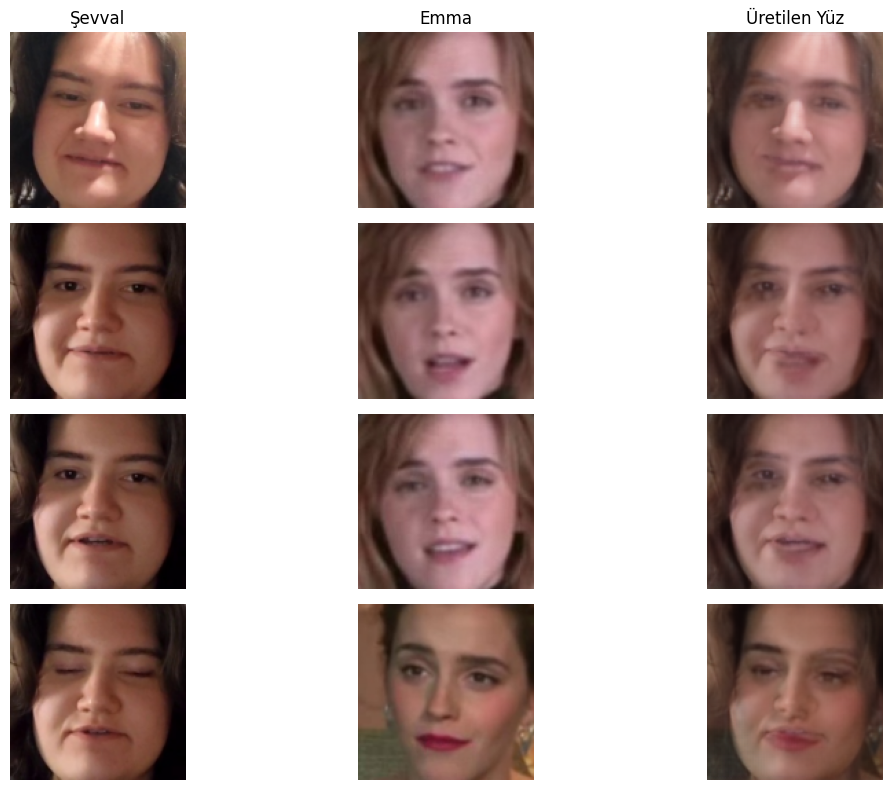

In [15]:
import matplotlib.pyplot as plt
import numpy as np


indices = [100, 200, 300, 400]

sevval_images = torch.stack([sevval_dataset[i % len(sevval_dataset)] for i in indices]).to(device)
emma_images = torch.stack([emma_dataset[i % len(emma_dataset)] for i in indices]).to(device)


mixed_images = (sevval_images + emma_images) / 2.0


model.eval()
with torch.no_grad():
    outputs = model(mixed_images)


sevval_np = sevval_images.cpu().permute(0, 2, 3, 1).numpy()
emma_np = emma_images.cpu().permute(0, 2, 3, 1).numpy()
output_np = outputs.cpu().permute(0, 2, 3, 1).numpy()

plt.figure(figsize=(12, 8))
for i in range(4):

    plt.subplot(4, 3, i * 3 + 1)
    plt.imshow(np.clip(sevval_np[i], 0, 1))
    plt.axis("off")
    if i == 0:
        plt.title("Şevval")


    plt.subplot(4, 3, i * 3 + 2)
    plt.imshow(np.clip(emma_np[i], 0, 1))
    plt.axis("off")
    if i == 0:
        plt.title("Emma")

    plt.subplot(4, 3, i * 3 + 3)
    plt.imshow(np.clip(output_np[i], 0, 1))
    plt.axis("off")
    if i == 0:
        plt.title("Üretilen Yüz")

plt.tight_layout()
plt.show()


3.VAE Eğitimi

*   Custom Veri Setinin Yüklenmesi
*   Model Ayarları



In [16]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import save_image

class CustomFaceDataset(Dataset):
    def __init__(self, folders, transform=None):
        self.image_paths = []
        for folder in folders:
            for file in os.listdir(folder):
                if file.lower().endswith((".png", ".jpg", ".jpeg")):
                    self.image_paths.append(os.path.join(folder, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

class VAE(nn.Module):
    def __init__(self, img_channels=3, feature_dim=128, latent_dim=64):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels, 32, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(128*16*16, latent_dim)
        self.fc_logvar = nn.Linear(128*16*16, latent_dim)
        self.decoder_input = nn.Linear(latent_dim, 128*16*16)

        self.decoder = nn.Sequential(
            nn.Unflatten(1, (128, 16, 16)),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, img_channels, 4, 2, 1),
            nn.Tanh()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_enc = self.encoder(x)
        mu = self.fc_mu(x_enc)
        logvar = self.fc_logvar(x_enc)
        z = self.reparameterize(mu, logvar)
        x_dec_input = self.decoder_input(z)
        x_out = self.decoder(x_dec_input)
        return x_out, mu, logvar

def vae_loss_fn(recon_x, x, mu, logvar):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

my_face_path = "/content/drive/MyDrive/FinalFaces/Sevval2"
emma_face_path = "/content/drive/MyDrive/extracted_faces_allemmawatson2"
dataset = CustomFaceDataset([my_face_path, emma_face_path], transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


vae = VAE().to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.0005)
num_epochs = 50

for epoch in range(num_epochs):
    vae.train()
    total_loss = 0
    for i, imgs in enumerate(dataloader):
        imgs = imgs.to(device)
        recon_imgs, mu, logvar = vae(imgs)
        loss = vae_loss_fn(recon_imgs, imgs, mu, logvar)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}")

    if (epoch + 1) % 10 == 0:
        vae.eval()
        with torch.no_grad():
            sample = imgs[:8]
            out, _, _ = vae(sample)
            out = (out + 1) / 2
            save_image(out, f"/content/reconstructed_epoch{epoch+1}.png")


Epoch [1/50], Loss: 5135.0970
Epoch [2/50], Loss: 1827.1178
Epoch [3/50], Loss: 819.4844
Epoch [4/50], Loss: 588.8217
Epoch [5/50], Loss: 511.7676
Epoch [6/50], Loss: 459.6015
Epoch [7/50], Loss: 422.6305
Epoch [8/50], Loss: 394.4975
Epoch [9/50], Loss: 379.7698
Epoch [10/50], Loss: 357.9914
Epoch [11/50], Loss: 347.1514
Epoch [12/50], Loss: 333.0872
Epoch [13/50], Loss: 317.0253
Epoch [14/50], Loss: 306.0764
Epoch [15/50], Loss: 295.1653
Epoch [16/50], Loss: 292.3712
Epoch [17/50], Loss: 281.4267
Epoch [18/50], Loss: 275.0409
Epoch [19/50], Loss: 270.4315
Epoch [20/50], Loss: 261.5082
Epoch [21/50], Loss: 256.0961
Epoch [22/50], Loss: 248.7600
Epoch [23/50], Loss: 245.7066
Epoch [24/50], Loss: 242.6148
Epoch [25/50], Loss: 238.8280
Epoch [26/50], Loss: 236.6937
Epoch [27/50], Loss: 230.6845
Epoch [28/50], Loss: 224.8964
Epoch [29/50], Loss: 228.1727
Epoch [30/50], Loss: 219.3932
Epoch [31/50], Loss: 217.7942
Epoch [32/50], Loss: 213.6220
Epoch [33/50], Loss: 213.8899
Epoch [34/50], Lo

# Basit VAE Üretilmiş Çıktı

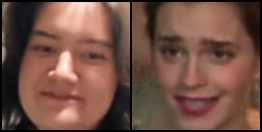

In [18]:
from IPython.display import Image, display
display(Image("/content/reconstructed_epoch50.png"))


# BETA VAE Eğitimi

*   Veri Seti Aktarımı
*   Beta Parametreleri
*   Encoder ve Decoderın Kurulması
*   Beta Loss Optimizasyonu
*   Model Eğitimi
*   Ağırlıkların Kayıt Edilmesi







In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image

class CustomFaceDataset(Dataset):
    def __init__(self, folders, transform=None):
        self.image_paths = []
        for folder in folders:
            for file in os.listdir(folder):
                if file.lower().endswith((".png", ".jpg", ".jpeg")):
                    self.image_paths.append(os.path.join(folder, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


class BetaVAE(nn.Module):
    def __init__(self, img_channels=3, latent_dim=64):
        super(BetaVAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(256*8*8, latent_dim)
        self.fc_logvar = nn.Linear(256*8*8, latent_dim)

        self.decoder_input = nn.Linear(latent_dim, 256*8*8)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (256, 8, 8)),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, img_channels, 4, 2, 1),
            nn.Tanh()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_enc = self.encoder(x)
        mu = self.fc_mu(x_enc)
        logvar = self.fc_logvar(x_enc)
        z = self.reparameterize(mu, logvar)
        x_dec_input = self.decoder_input(z)
        x_out = self.decoder(x_dec_input)
        return x_out, mu, logvar, z


def beta_vae_loss(recon_x, x, mu, logvar, beta=4):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl_loss


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


my_face_path = "/content/drive/MyDrive/FinalFaces/Sevval2"
emma_face_path = "/content/drive/MyDrive/extracted_faces_allemmawatson2"
dataset = CustomFaceDataset([my_face_path, emma_face_path], transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


latent_dim = 64
vae = BetaVAE(latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.0005)
num_epochs = 50

for epoch in range(num_epochs):
    vae.train()
    total_loss = 0
    for imgs in dataloader:
        imgs = imgs.to(device)
        recon_imgs, mu, logvar, _ = vae(imgs)
        loss = beta_vae_loss(recon_imgs, imgs, mu, logvar, beta=4)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}")

    if (epoch+1) % 10 == 0:
        vae.eval()
        with torch.no_grad():
            sample = imgs[:8]
            out, _, _, _ = vae(sample)
            out = (out + 1) / 2
            save_image(out, f"/content/reconstructed_epoch{epoch+1}.png")

vae.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    dec_input = vae.decoder_input(z)
    samples = vae.decoder(dec_input)
    samples = (samples + 1) / 2
    save_image(samples, "/content/sampled_faces.png", nrow=4)



Epoch [1/50], Loss: 9000.6327
Epoch [2/50], Loss: 1812.9016
Epoch [3/50], Loss: 998.7922
Epoch [4/50], Loss: 835.5422
Epoch [5/50], Loss: 746.5699
Epoch [6/50], Loss: 693.2700
Epoch [7/50], Loss: 655.5489
Epoch [8/50], Loss: 611.6644
Epoch [9/50], Loss: 575.8216
Epoch [10/50], Loss: 545.2060
Epoch [11/50], Loss: 572.1495
Epoch [12/50], Loss: 496.6006
Epoch [13/50], Loss: 504.5408
Epoch [14/50], Loss: 489.1608
Epoch [15/50], Loss: 469.4965
Epoch [16/50], Loss: 463.7993
Epoch [17/50], Loss: 451.8290
Epoch [18/50], Loss: 448.1977
Epoch [19/50], Loss: 439.8846
Epoch [20/50], Loss: 430.6967
Epoch [21/50], Loss: 416.5743
Epoch [22/50], Loss: 422.2578
Epoch [23/50], Loss: 416.2099
Epoch [24/50], Loss: 405.6626
Epoch [25/50], Loss: 388.4742
Epoch [26/50], Loss: 381.7551
Epoch [27/50], Loss: 375.9816
Epoch [28/50], Loss: 370.0304
Epoch [29/50], Loss: 360.9761
Epoch [30/50], Loss: 363.6297
Epoch [31/50], Loss: 358.7056
Epoch [32/50], Loss: 358.7156
Epoch [33/50], Loss: 353.5690
Epoch [34/50], Lo

In [ ]:

save_path = "/content/beta_vae_model.pth"
torch.save(vae.state_dict(), save_path)
print(f"Model kaydedildi: {save_path}")


Model kaydedildi: /content/beta_vae_model.pth


# BETA VAE Sonucu Üretilenler

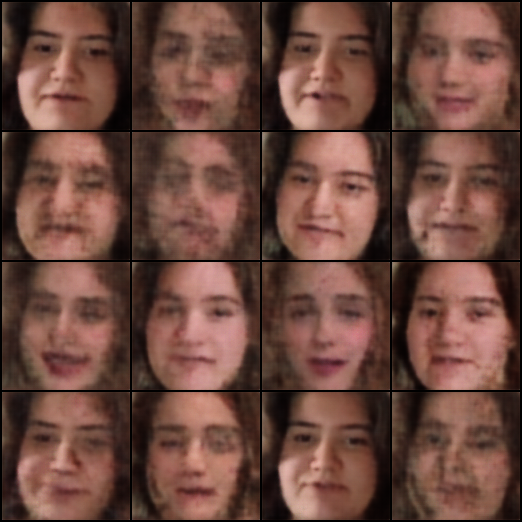

In [ ]:

from IPython.display import Image, display
display(Image("/content/sampled_faces.png"))


In [ ]:
import os

save_dir = "/content/drive/MyDrive/vae_dcgan_hybrid"
os.makedirs(save_dir, exist_ok=True)

# Encoder Ve Decoder Katmanlarının Zenginleştirilmesiyle Oluşan Custom Beta VAE Modeli


*  Loss Function ı Azaltmak Hedefleniyor




In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image


class CustomFaceDataset(Dataset):
    def __init__(self, folders, transform=None):
        self.image_paths = []
        for folder in folders:
            for file in os.listdir(folder):
                if file.lower().endswith((".png", ".jpg", ".jpeg")):
                    self.image_paths.append(os.path.join(folder, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


class BetaVAE(nn.Module):
    def __init__(self, img_channels=3, latent_dim=128):
        super(BetaVAE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(512 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(512 * 4 * 4, latent_dim)

        #Decoder
        self.decoder_input = nn.Linear(latent_dim, 512 * 4 * 4)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (512, 4, 4)),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, img_channels, 4, 2, 1),
            nn.Tanh()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_enc = self.encoder(x)
        mu = self.fc_mu(x_enc)
        logvar = self.fc_logvar(x_enc)
        z = self.reparameterize(mu, logvar)
        x_dec_input = self.decoder_input(z)
        x_out = self.decoder(x_dec_input)
        return x_out, mu, logvar, z


def beta_vae_loss(recon_x, x, mu, logvar, beta=4):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl_loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

my_face_path = "/content/drive/MyDrive/FinalFaces/Sevval2"
emma_face_path = "/content/drive/MyDrive/extracted_faces_allemmawatson2"
dataset = CustomFaceDataset([my_face_path, emma_face_path], transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

latent_dim = 256
vae = BetaVAE(latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.0001)
num_epochs = 150

for epoch in range(num_epochs):
    vae.train()
    total_loss = 0
    for imgs in dataloader:
        imgs = imgs.to(device)
        recon_imgs, mu, logvar, _ = vae(imgs)
        loss = beta_vae_loss(recon_imgs, imgs, mu, logvar, beta=4)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}")

    if (epoch + 1) % 10 == 0:
        vae.eval()
        with torch.no_grad():
            sample = imgs[:8]
            out, _, _, _ = vae(sample)
            out = (out + 1) / 2
            save_image(out, f"/content/reconstructed_epoch{epoch+1}.png")

vae.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    dec_input = vae.decoder_input(z)
    samples = vae.decoder(dec_input)
    samples = (samples + 1) / 2
    save_image(samples, "/content/VAEsonucu.png", nrow=4)


Epoch [1/150], Loss: 13836.9146
Epoch [2/150], Loss: 4943.7618
Epoch [3/150], Loss: 2674.0217
Epoch [4/150], Loss: 1779.1818
Epoch [5/150], Loss: 1318.1509
Epoch [6/150], Loss: 1128.7485
Epoch [7/150], Loss: 984.9977
Epoch [8/150], Loss: 909.2269
Epoch [9/150], Loss: 837.4688
Epoch [10/150], Loss: 804.8951
Epoch [11/150], Loss: 754.3762
Epoch [12/150], Loss: 727.5229
Epoch [13/150], Loss: 701.6424
Epoch [14/150], Loss: 675.9472
Epoch [15/150], Loss: 659.4271
Epoch [16/150], Loss: 639.1618
Epoch [17/150], Loss: 621.5576
Epoch [18/150], Loss: 612.6928
Epoch [19/150], Loss: 586.7118
Epoch [20/150], Loss: 582.9877
Epoch [21/150], Loss: 566.7556
Epoch [22/150], Loss: 550.1907
Epoch [23/150], Loss: 543.6090
Epoch [24/150], Loss: 534.1111
Epoch [25/150], Loss: 523.3005
Epoch [26/150], Loss: 519.6754
Epoch [27/150], Loss: 513.2324
Epoch [28/150], Loss: 504.2562
Epoch [29/150], Loss: 492.8886
Epoch [30/150], Loss: 484.4875
Epoch [31/150], Loss: 486.7363
Epoch [32/150], Loss: 476.2243
Epoch [33/

In [ ]:
!pip install torchsummary

In [ ]:

import torch
save_path = "/content/drive/MyDrive/custombeta_vae_sevval_emma.pth"
torch.save({
    'model_state_dict': vae.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'latent_dim': latent_dim
}, save_path)
print(f"Model başarıyla kaydedildi: {save_path}")


Model başarıyla kaydedildi: /content/drive/MyDrive/custombeta_vae_sevval_emma.pth


# Geliştirlimiş Beta VAE Çıktısı

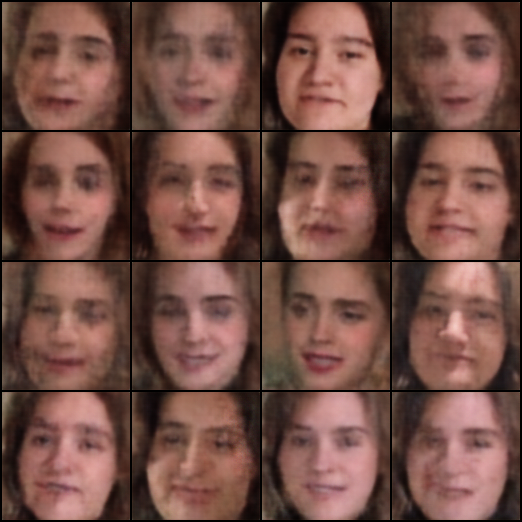

In [ ]:
from IPython.display import Image, display
display(Image("/content/VAEsonucu.png"))


# Kaliteyi Arttırmaya Yönelik Eğitilen BETA VAE


*   Gradyan Kırma işlemi
*   Annealing ile modeli daha karalı hale getirmek



In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image

class CustomFaceDataset(Dataset):
    def __init__(self, folders, transform=None):
        self.image_paths = []
        for folder in folders:
            for file in os.listdir(folder):
                if file.lower().endswith((".png", ".jpg", ".jpeg")):
                    self.image_paths.append(os.path.join(folder, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


class BetaVAE(nn.Module):
    def __init__(self, img_channels=3, latent_dim=128):
        super(BetaVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(512 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(512 * 4 * 4, latent_dim)

        self.decoder_input = nn.Linear(latent_dim, 512 * 4 * 4)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (512, 4, 4)),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, img_channels, 4, 2, 1),
            nn.Tanh()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_enc = self.encoder(x)
        mu = self.fc_mu(x_enc)
        logvar = self.fc_logvar(x_enc)
        z = self.reparameterize(mu, logvar)
        x_dec_input = self.decoder_input(z)
        x_out = self.decoder(x_dec_input)
        return x_out, mu, logvar, z


def beta_vae_loss(recon_x, x, mu, logvar, beta):

    recon_loss = F.l1_loss(recon_x, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl_loss


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

my_face_path = "/content/drive/MyDrive/FinalFaces/Sevval2"
emma_face_path = "/content/drive/MyDrive/extracted_faces_allemmawatson2"
dataset = CustomFaceDataset([my_face_path, emma_face_path], transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

latent_dim = 256
vae = BetaVAE(latent_dim=latent_dim).to(device)


optimizer = torch.optim.Adam(vae.parameters(), lr=0.0002)
num_epochs = 200


beta_start = 0.1
beta_max = 4.0

for epoch in range(num_epochs):
    vae.train()
    total_loss = 0

    beta = beta_start + (beta_max - beta_start) * (epoch / (num_epochs - 1))

    for imgs in dataloader:
        imgs = imgs.to(device)
        recon_imgs, mu, logvar, _ = vae(imgs)
        loss = beta_vae_loss(recon_imgs, imgs, mu, logvar, beta=beta)

        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=5)

        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}, Beta: {beta:.4f}")

    if (epoch + 1) % 10 == 0:
        vae.eval()
        with torch.no_grad():
            sample = imgs[:8]
            out, _, _, _ = vae(sample)
            out = (out + 1) / 2
            save_image(out, f"/content/reconstructed_epoch{epoch+1}.png")

vae.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    dec_input = vae.decoder_input(z)
    samples = vae.decoder(dec_input)
    samples = (samples + 1) / 2
    save_image(samples, "/content/DerinkatmanBVAE.png", nrow=4)


Epoch [1/200], Loss: 11967.9628, Beta: 0.1000
Epoch [2/200], Loss: 4610.0550, Beta: 0.1196
Epoch [3/200], Loss: 3599.7484, Beta: 0.1392
Epoch [4/200], Loss: 3199.4241, Beta: 0.1588
Epoch [5/200], Loss: 2925.5283, Beta: 0.1784
Epoch [6/200], Loss: 2701.0876, Beta: 0.1980
Epoch [7/200], Loss: 2556.7303, Beta: 0.2176
Epoch [8/200], Loss: 2432.2454, Beta: 0.2372
Epoch [9/200], Loss: 2412.1062, Beta: 0.2568
Epoch [10/200], Loss: 2277.0364, Beta: 0.2764
Epoch [11/200], Loss: 2231.1900, Beta: 0.2960
Epoch [12/200], Loss: 2199.3818, Beta: 0.3156
Epoch [13/200], Loss: 2135.1433, Beta: 0.3352
Epoch [14/200], Loss: 2060.6146, Beta: 0.3548
Epoch [15/200], Loss: 1966.7191, Beta: 0.3744
Epoch [16/200], Loss: 1985.8484, Beta: 0.3940
Epoch [17/200], Loss: 1963.3557, Beta: 0.4136
Epoch [18/200], Loss: 1958.1999, Beta: 0.4332
Epoch [19/200], Loss: 1921.2773, Beta: 0.4528
Epoch [20/200], Loss: 1913.4013, Beta: 0.4724
Epoch [21/200], Loss: 1903.0908, Beta: 0.4920
Epoch [22/200], Loss: 1888.8640, Beta: 0.5

In [ ]:
# Model Kayıt
import torch
save_path = "/content/drive/MyDrive/custombetavaedeneme2.pth"
torch.save({
    'model_state_dict': vae.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'latent_dim': latent_dim
}, save_path)
print(f"Model başarıyla kaydedildi: {save_path}")


Model başarıyla kaydedildi: /content/drive/MyDrive/custombetavaedeneme2.pth


# Son Çıktı Version 2 VAE için

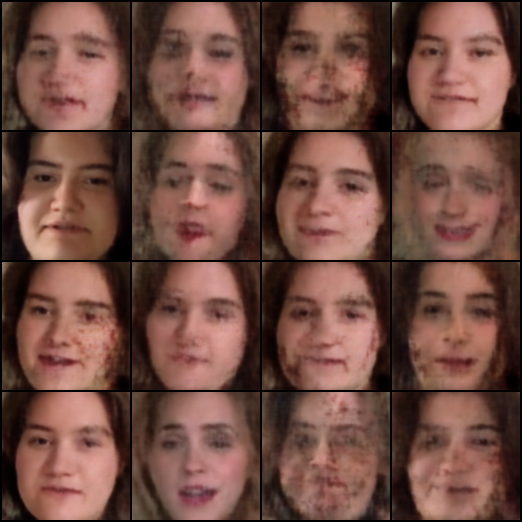

In [ ]:
from IPython.display import Image, display
display(Image("/content/DerinkatmanBVAE.png"))